<a href="https://colab.research.google.com/github/Antika20/Expert_-Machine-Learning/blob/Notebook-Modul/Modul_Computer_Vision_Model_Klasifikasi_Rambu_Lalu_Lintas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Data 

# Import Module 

Link Dataset : https://www.kaggle.com/datasets/saadhaxxan/germantrafficsigns

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# install kaggle package
!pip install -q kaggle

In [ ]:
# upload kaggle.json
from google.colab import files
files.upload()

In [4]:
# make directory and change permission
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [5]:
# download dataset, choose 'copy api command' from kaggle dataset
!kaggle datasets download -d saadhaxxan/germantrafficsigns

 96% 113M/118M [00:00<00:00, 168MB/s] 
100% 118M/118M [00:00<00:00, 172MB/s]


In [6]:
# Ekstrak ZIP 
from zipfile import ZipFile
file_name ="/content/germantrafficsigns.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


In [7]:
## Load the data
training_file = "/content/train.p"
testing_file = "/content/test.p"   
 
# Open and load the training file 
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
 
# Open and load the testing file
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
print("Data loaded")

Data loaded


# Exploare Data 

Tahap 1 : 

Tahapan eksplorasi data yang pertama adalah membaca file signnames.csv. File ini berisi id dan nama kelas dataset traffic sign.

In [8]:
## Buat pandas dataframe untuk load data csv
## File csv ini berupa ClassId dan SignName
 
sign_name_df = pd.read_csv('/content/signnames.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Tahap 2 : 

Selanjutnya, kita akan mendefinisikan fitur dan label pada data pickle yang telah di-load, lalu mengonversi lists menjadi numpy array. Kita akan melakukan ini pada data Training dan data Testing.

Output dari kode ini adalah shape X_train, y_train, X_test dan y_test, 

In [9]:
# Definisikan fitur dan label untuk data training
X, y = train['features'], train['labels']
 
# Mengubah lists menjadi numpy arrays
data = np.array(X)
labels = np.array(y)
print(data.shape, labels.shape)
 
# Definisikan fitur dan label untuk data testing
X_test, y_test = test['features'], test['labels']
 
# Mengubah lists menjadi numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape, y_test.shape)

(34799, 32, 32, 3) (34799,)
(12630, 32, 32, 3) (12630,)


Tahapan selanjutnya adalah melakukan split pada data training sehingga menjadi training dan validasi. Jadi, nanti kita akan memiliki tiga data, antara lain:


*   Data training
*   Data validasi
*   Data testing









Di sini, kita menggunakan ukuran data validasi sebesar 10% dari data training. Kita juga set random_state=0 (bilangan integer bebas) agar proses split membagi data ke dalam kelompok yang sama. Di tahap ini, keluarannya merupakan shape dari X_train, X_val, y_train, dan y_val

In [10]:
# Split training data into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


Selanjutnya, visualisasikan distribusi kelas pada data training, validasi, dan testing. Hal ini perlu kita lakukan untuk melihat bagaimana distribusi kelas pada masing-masing data di atas. 

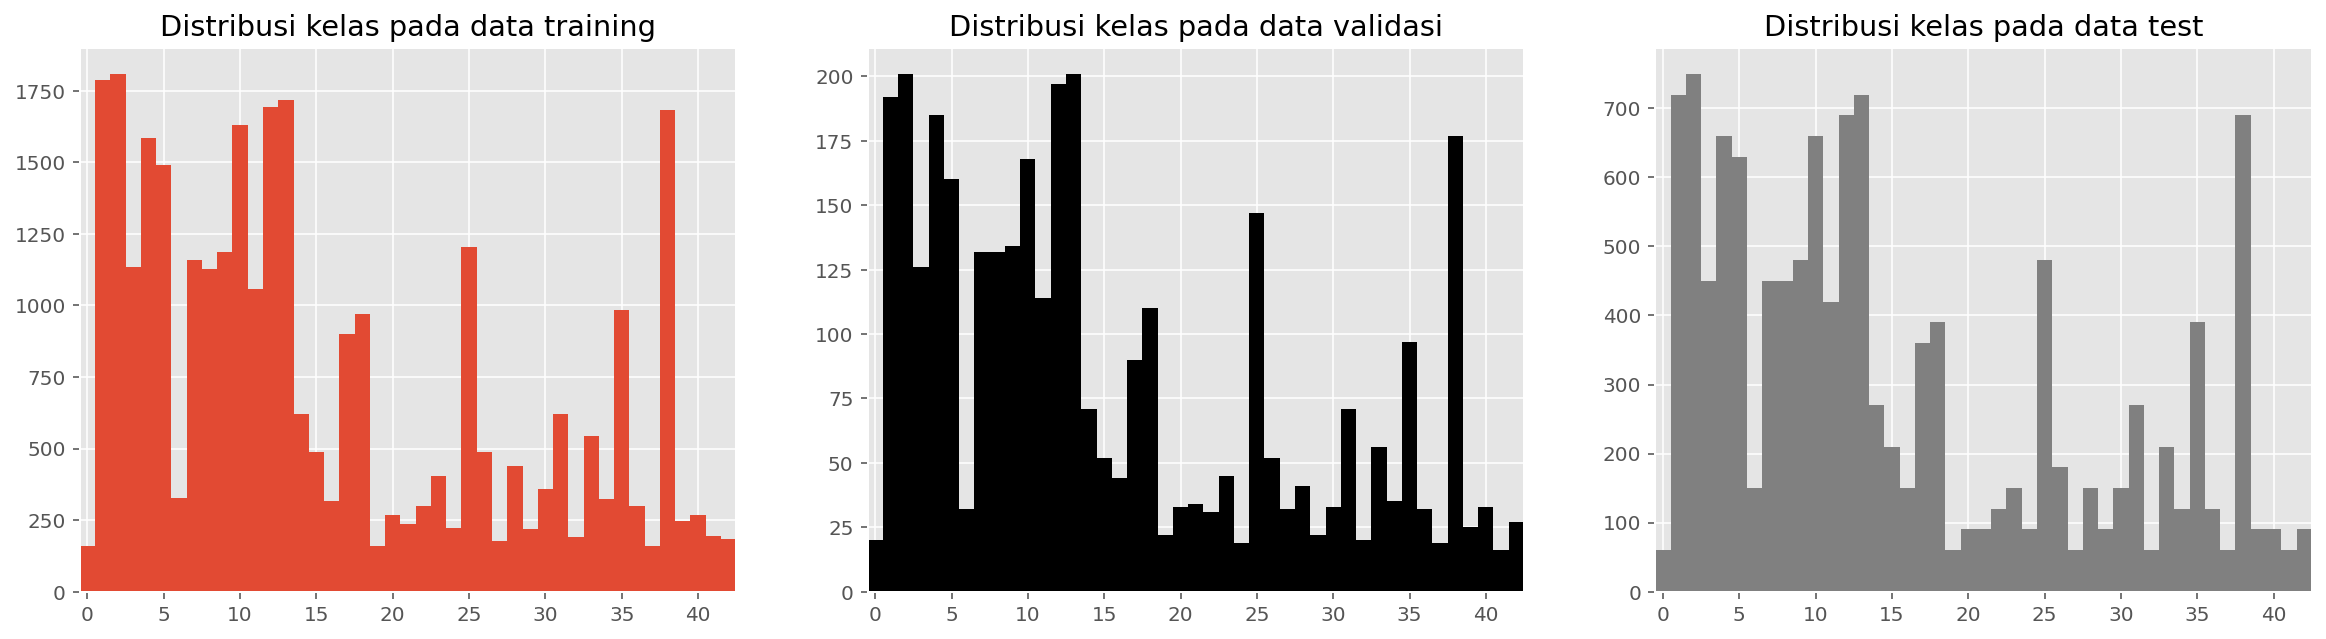

In [11]:
n_labels = np.unique(y_train).size
def hist_data(y_data, title=None, ax=None, **kwargs):
    if not ax :
        fig = plt.figure()
        ax = fig.add_subplot(111)
    ax.hist(y_data, np.arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
    ax.set_xlim(-0.5, n_labels-0.5)
    if 'label' in kwargs : ax.legend()
    if title : ax.set_title(title)
        
fig,ax = plt.subplots(1,3, figsize=(20,5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='grey')

Dari gambar, terlihat bahwa distribusi kelas masing-masing bagian data terlihat mirip. Oleh karena itu, kita tidak perlu melakukan proses normalisasi. 

# Data Preparation 

Tahap selanjutnya adalah Data Preparation. Pada tahap ini kita akan mengonversi label pada data training dan validasi dengan teknik one hot encoding. Tujuannya agar label, yang sebelumnya merupakan tipe data string menjadi fitur kategorik. Kita akan menggunakan fungsi to_categorical dari library tensorflow. 

In [12]:
# Konversi label dengan teknik one hot encoding
from tensorflow.keras.utils import to_categorical
 
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [13]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [14]:
print(y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Training dengan CNN 

Di sini kita akan langsung implementasikan callback pada model. Kita set agar training berhenti saat akurasi model mencapai 96%. Penggunaan callback akan mempersingkat waktu training sebab kita sudah definisikan di awal berapa nilai akurasi yang dibutuhkan. Sehingga, saat model telah mencapai akurasi tersebut, proses training akan berhenti. Gunakan kode berikut.

In [15]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi telah mencapai >96%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

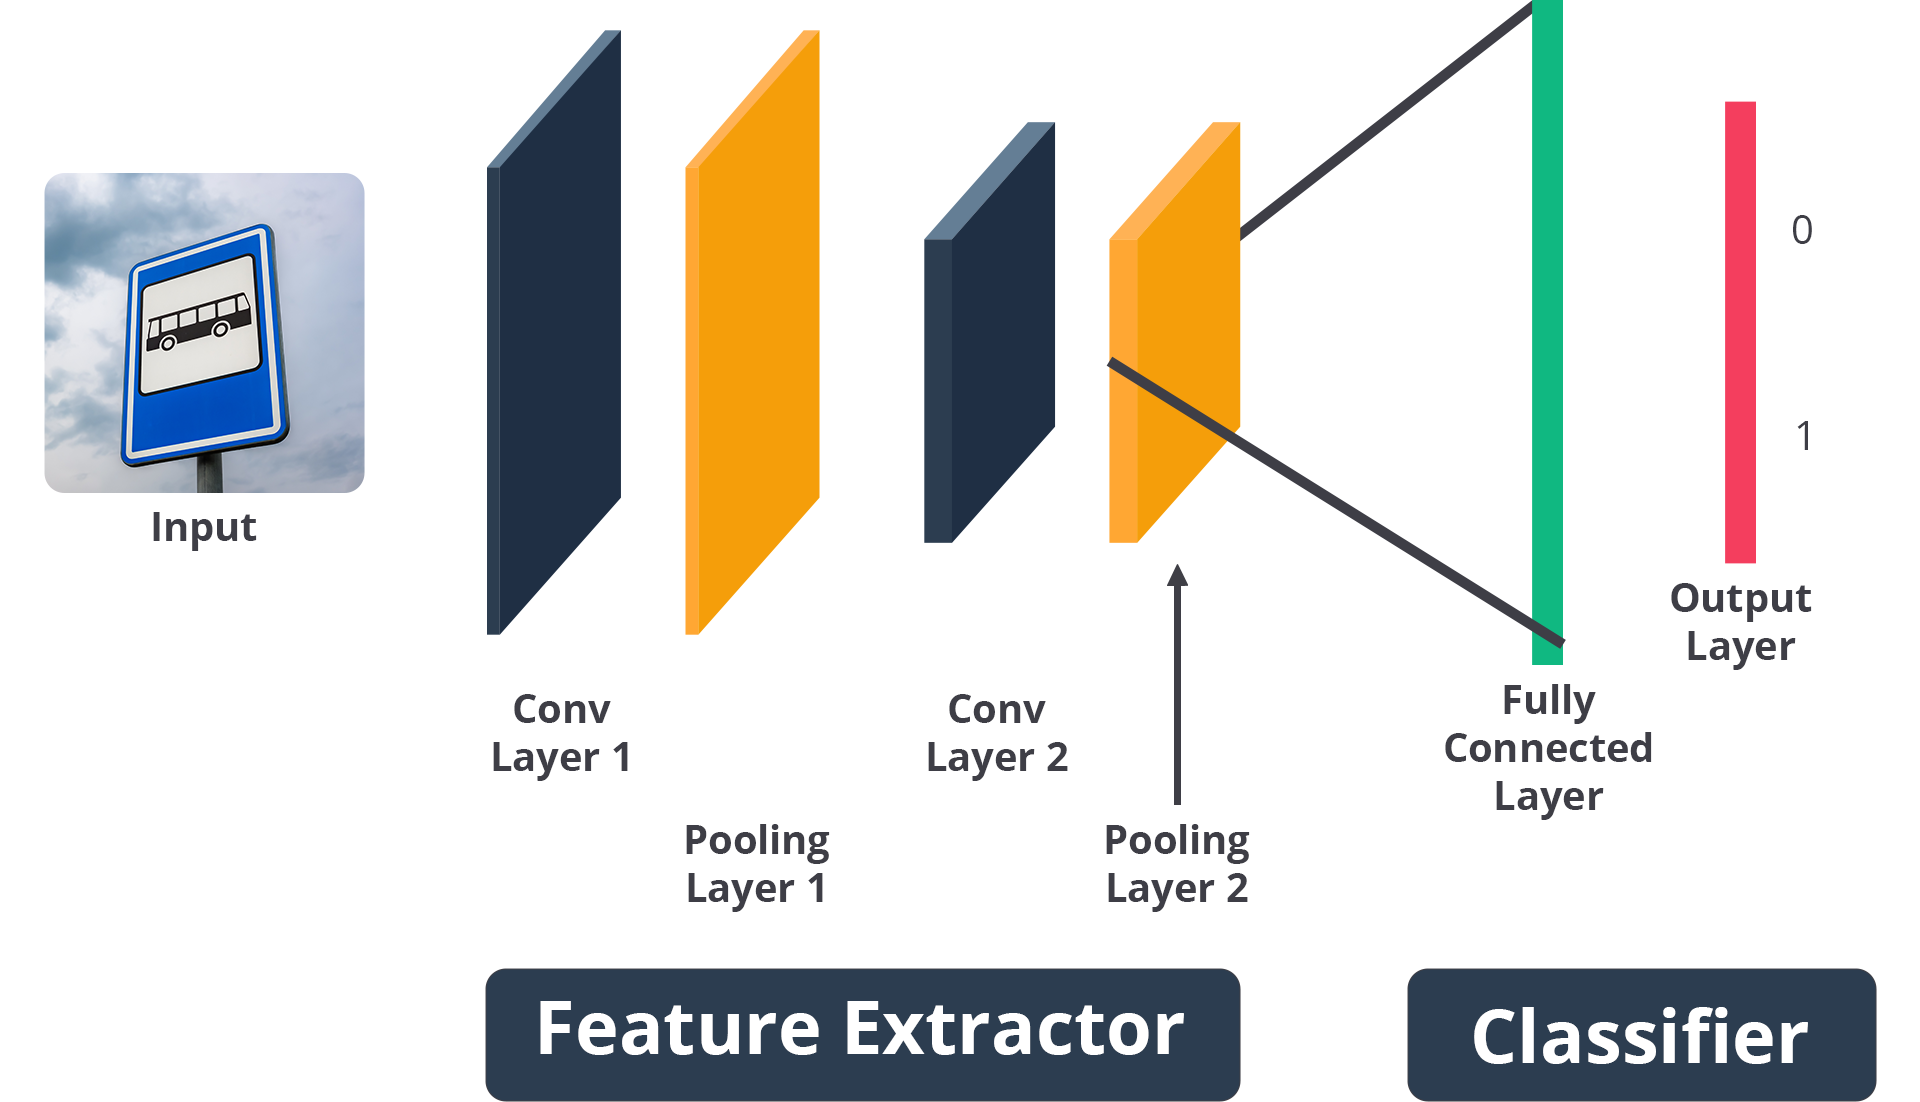

Berikut uraiannya:


*   Lapisan Input akan menampung gambar sebagai array 3D dari nilai piksel.

*   Lapisan Convolutional (konvolusi) akan menghitung perkalian (dot product) antara kernel dan sub-array dari gambar input yang berukuran sama dengan kernel. Sebagai contoh pada gambar berikut kita menggunakan kernel berukuran 3x3 dan melakukan proses perkalian antara kernel dan sub-array pada gambar masukan.


Matriks kernel akan melintasi setiap piksel pada gambar secara berurutan dari kiri ke kanan dan atas ke bawah. Ia menghitung nilai output untuk setiap piksel yang dilintasi kernel dengan teknik perkalian matriks dot product. Kemudian, semua nilai yang dihasilkan dari proses perkalian dot product ini akan menjadi nilai piksel tunggal dari gambar keluaran. Proses ini diulang sampai seluruh gambar input terlewati oleh kernel.

*   RELU atau Rectified Linear Activation Unit merupakan fungsi aktivasi linear untuk jaringan saraf tiruan. Ia telah menjadi fungsi aktivasi default karena model yang menggunakannya mencapai kinerja lebih baik dengan cepat.

Ingatlah, fungsi aktivasi digunakan untuk memetakan hasil penjumlahan antara bobot dengan masukan (disebut sebagai weighted sum) menjadi nilai tertentu. Fungsi ini memungkinkan perceptron dapat menyesuaikan pola untuk data non linear.

Nah, jika weighted sum ini bernilai positif, RELU akan mengembalikan nilainya secara langsung. Sebaliknya, jika nilainya negatif, RELU akan menghasilkan nilai nol. RELU didefinisikan sebagai:

f(x) = max(0, x), dengan x adalah jaringan saraf masukan (weighted sum).

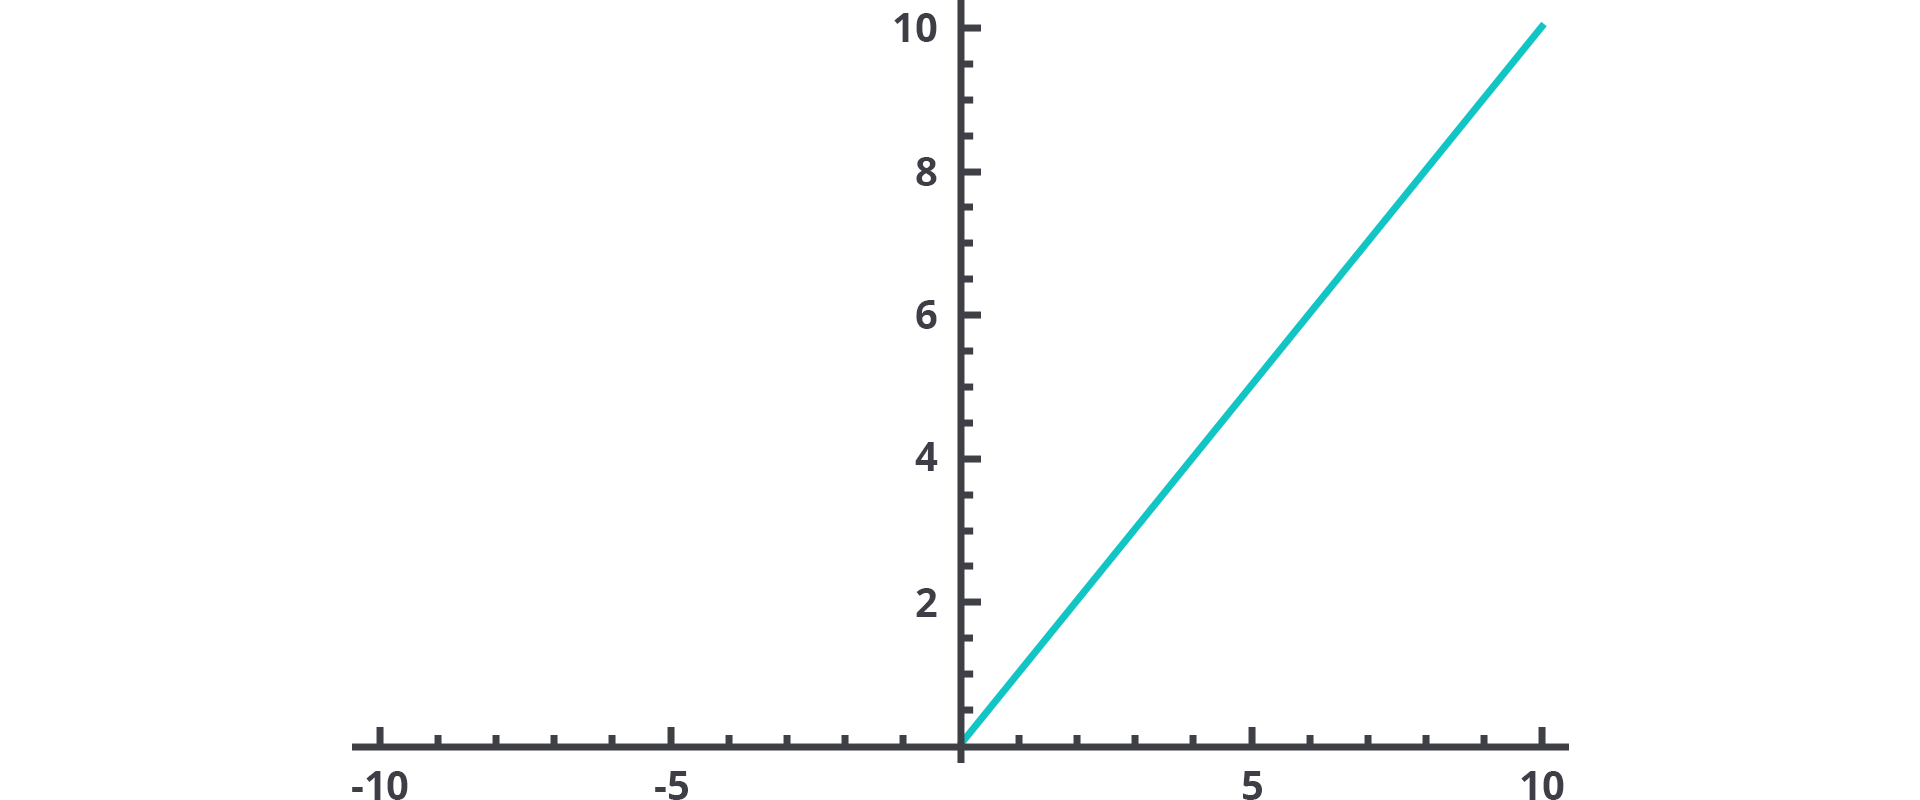

*   Lapisan Pooling akan melakukan downsampling pada shape suatu gambar sehingga mengakibatkan pengurangan dimensi gambar. Tujuannya adalah agar data komputasi yang dibutuhkan untuk memproses citra menjadi berkurang.

Pooling layer terdiri dari dua jenis, average pooling dan max pooling. Pada max pooling, setiap area dengan luas piksel tertentu akan diambil satu buah piksel yang memiliki nilai tertinggi. Sementara pada average pooling, nilai yang diambil adalah nilai rata-rata dari suatu area kernel.

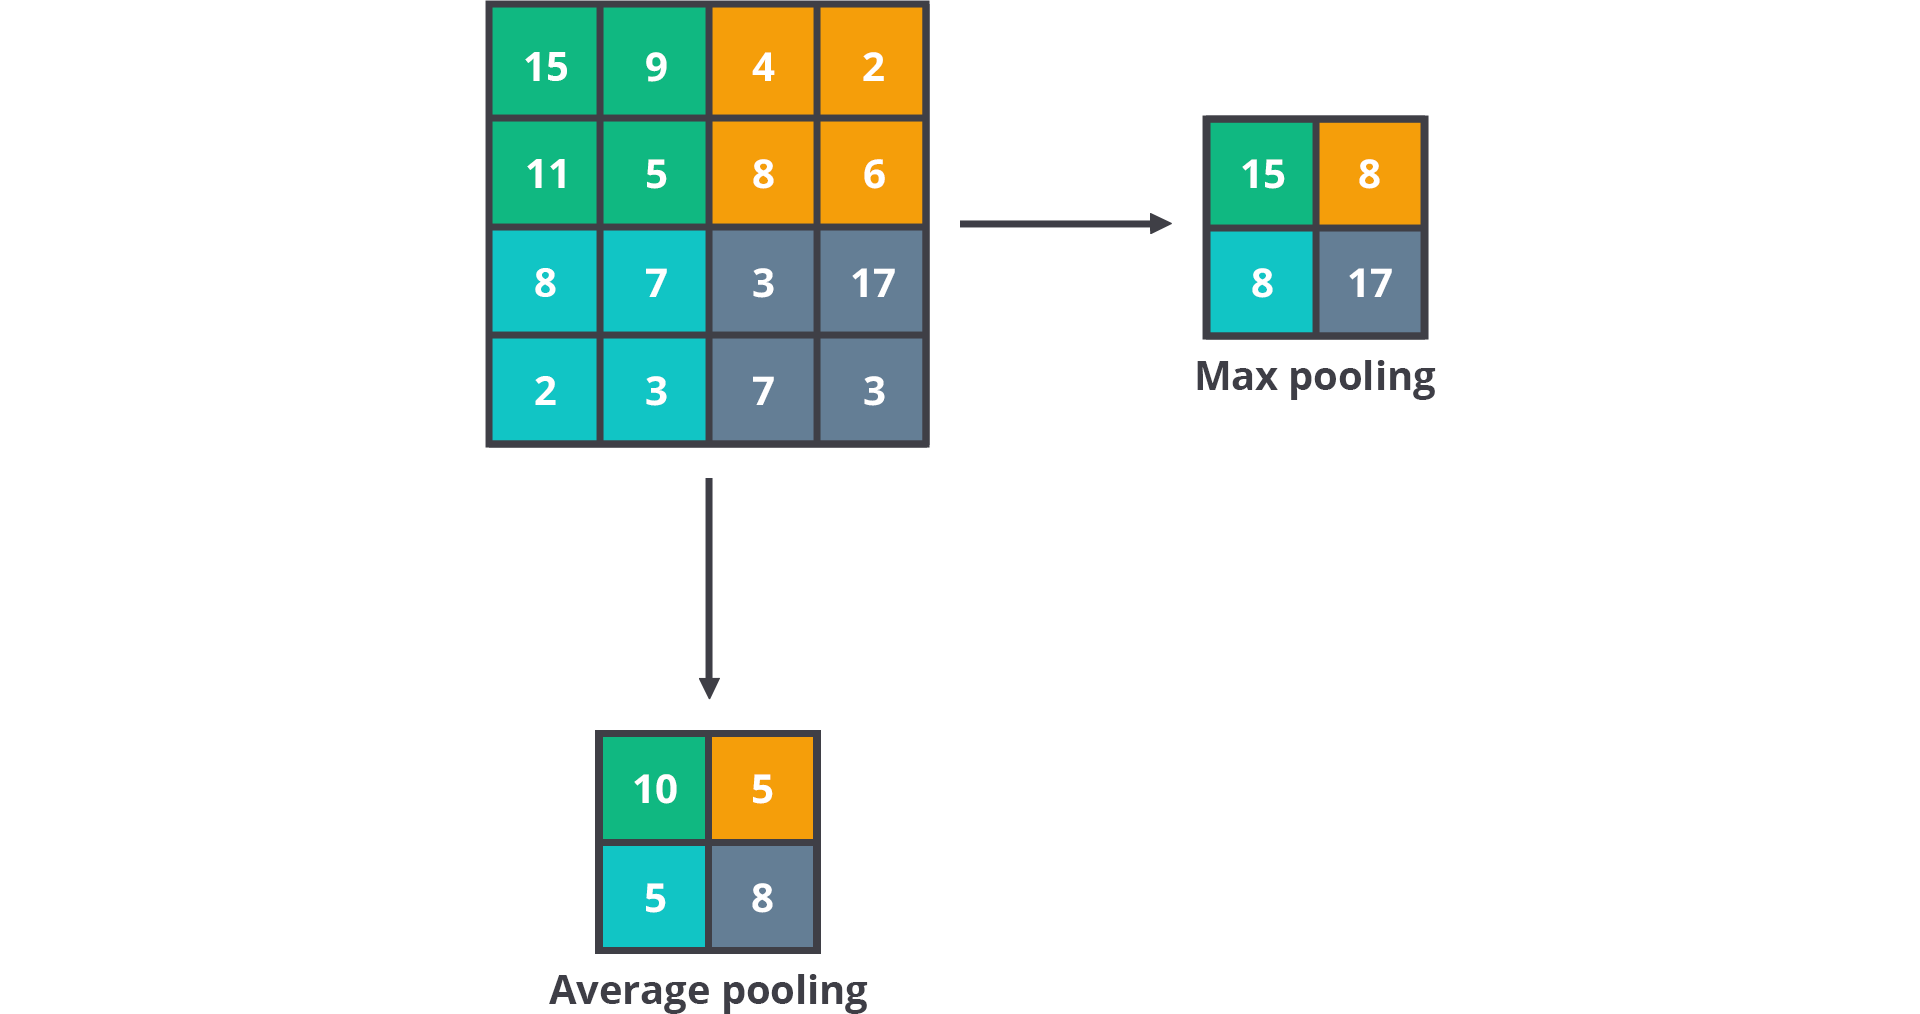

Lapisan pooling juga bertindak sebagai pengendali noise (gangguan). Namun, max pooling memiliki kinerja lebih baik dibanding dengan average pooling. Oleh karena itu, max pooling lebih sering digunakan pada proses training CNN. Kita juga akan menggunakannya dalam proyek ini.

*   Lapisan FC (Fully-Connected) akan menghitung skor kelas untuk setiap kategori klasifikasi. Lapisan ini sama dengan jaringan saraf di mana setiap neuron terhubung ke semua neuron pada lapisan secara berurutan. Output akhir dihitung menggunakan softmax yang memberikan probabilitas setiap kelas untuk fitur yang diberikan.

Untuk melewatkan gambar masukan ke lapisan FC, kita perlu melakukan proses flatten sehingga semua nilai piksel diatur dalam satu kolom. Flatten adalah proses mengubah data menjadi array 1 dimensi untuk dimasukkan ke lapisan berikutnya. Kita membuat output dari lapisan konvolusi menjadi satu vektor fitur yang panjang (flat). Kemudian, fitur yang telah melewati proses flatten diteruskan ke lapisan FC








Pada proyek ini, kita menggunakan arsitektur 2 convolutional layer dan 1 fully connected layer. Untuk lebih jelasnya, mari kita bahas setiap layernya.

Pertama, inisialisasi model Sequential dan tentukan input shape untuk model. Set layer ini menggunakan kernel berukuran 5x5 untuk mempelajari fitur pada data traffic sign. Input masukan kita sesuaikan dengan shape X_train yaitu sebuah gambar RGB berukuran 32 pixels (32, 32, 3). Fungsi aktivasi yang akan kita gunakan adalah RELU, seperti yang telah dijelaskan sebelumnya. Max Pooling layer juga kita tambahkan untuk mengurangi dimensi.

Di sini, kita juga menerapkan dropout. Dropout merupakan salah satu hyperparameter yang bertujuan untuk mengurangi overfitting. Ia bekerja dengan memutus atau menjatuhkan (drop) unit selama proses training neural network sehingga layer atau lapisannya menjadi tidak aktif. Berdasarkan dokumentasi dari Keras, argumen rate untuk dropout adalah tipe data float antara 0 dan 1, yang merupakan bagian dari unit yang akan di-drop. 

Jika kita set dropout rate = 0.25, artinya, kita akan melepas 25% dari layer dan membuatnya menjadi tidak aktif selama proses training.

Berikut set layer kita yang pertama. Pada arsitektur ini, set parameter layer sebagai berikut:


*   Ukuran filter untuk proses konvolusi=32
*   Ukuran kernel=(5,5)


*  Fungsi aktivasi RELU
*   Pooling yang kita gunakan adalah Maxpool dengan ukuran 2,2

*  Dropout rate sebesar 0.25







In [16]:
# Arsitektur Layer 
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Parameter layer Kedua 
# Selanjutnya untuk Layer Kedua memakai arsitektur sebagai berikut :
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Full connected layer 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

# Melihat Arsitektur model 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

Penjelasan Full conected layer

Pada bagian ini, kita juga menerapkan Dense layer. Dense layer merupakan lapisan saraf yang menerima input dari semua neuron pada lapisan sebelumnya. Menurut dokumentasi keras, lapisan ini mengimplementasikan operasi matriks antara (activation(dot(input, kernel) + bias). Fungsi aktivasi merupakan argumen untuk mendefinisikan fungsi aktivasi yang kita gunakan, dalam hal ini RELU. Sedangkan bias adalah vektor yang dibuat oleh layer dan hanya akan aktif jika kita definisikan sebelumnya (use_bias=true).

Itulah arsitektur jaringan saraf yang akan kita gunakan pada proyek ini. Arsitektur lengkapnya dapat dilihat sebagai berikut.

Selanjutnya, kita akan melakukan kompilasi model dan memanggil fungsi fit untuk memulai training. Implementasikan kode berikut.

In [17]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])
model.save("my_model.h5")

Epoch 1/25
979/979 [==============================] - 22s 6ms/step - loss: 1.7565 - accuracy: 0.5401 - val_loss: 0.4102 - val_accuracy: 0.8822
Epoch 2/25
979/979 [==============================] - 5s 5ms/step - loss: 0.5887 - accuracy: 0.8241 - val_loss: 0.1701 - val_accuracy: 0.9532
Epoch 3/25
979/979 [==============================] - 5s 5ms/step - loss: 0.4228 - accuracy: 0.8713 - val_loss: 0.1177 - val_accuracy: 0.9678
Epoch 4/25
979/979 [==============================] - 5s 5ms/step - loss: 0.3509 - accuracy: 0.8938 - val_loss: 0.1351 - val_accuracy: 0.9601
Epoch 5/25
979/979 [==============================] - 5s 5ms/step - loss: 0.3187 - accuracy: 0.9059 - val_loss: 0.1199 - val_accuracy: 0.9658
Epoch 6/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2860 - accuracy: 0.9169 - val_loss: 0.0747 - val_accuracy: 0.9787
Epoch 7/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2655 - accuracy: 0.9210 - val_loss: 0.0834 - val_accuracy: 0.9773
Epoch

Ketahuilah, hasil training pada machine learning tidak selalu sama. Anda mungkin akan mendapat hasil akurasi tertentu yang diperoleh dengan lebih cepat atau lebih lambat. Namun, secara umum, tidak akan terlalu jauh bedanya. 

Perbedaan hasil ini bisa jadi disebabkan oleh perilaku dan kinerja algoritma machine learning yang bersifat stokastik. Deep neural network dilatih menggunakan algoritma optimasi penurunan gradien stokastik. Stokastik di sini mengacu pada proses yang melibatkan beberapa situasi acak (random) dan ketidakpastian (uncertainty). Sifat stokastik pada algoritma machine learning adalah konsep dasar yang penting dan harus dipahami oleh para praktisi machine learning. Tujuannya, agar kita dapat menafsirkan perilaku banyak model prediktif secara efektif. 

Terakhir, untuk mendapatkan grafik akurasi dan loss, terapkan kode berikut.

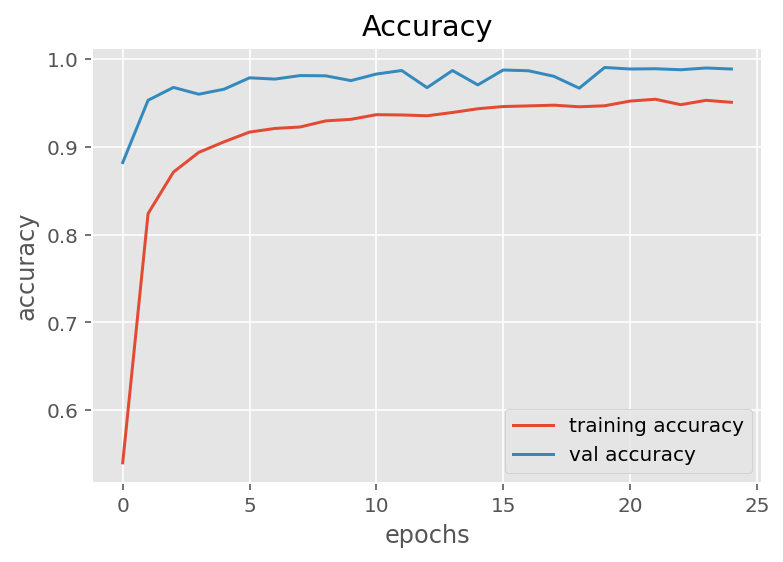

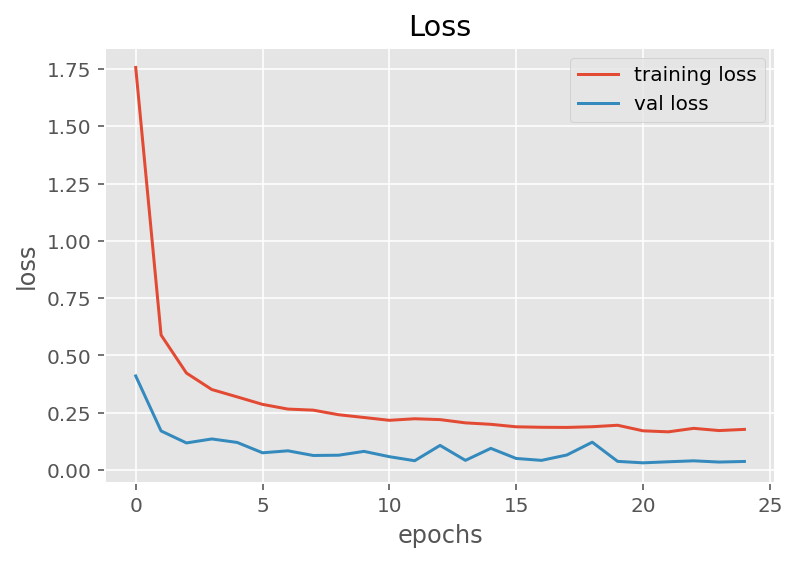

In [18]:
# Plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing Model 

Pada tahap eksplorasi data, kita membagi data menjadi tiga bagian, yaitu data training, validasi, dan testing. Setelah memperoleh hasil pada data training dan validasi, kita akan menguji model pada data yang belum pernah dilihat sebelumnya, yaitu data testing. Untuk mengujinya, implementasikan kode berikut.

In [19]:
# Testing accuracy with the test data
from sklearn.metrics import accuracy_score
 
pred=np.argmax(model.predict(X_test), axis=-1)
accuracy_score(y_test, pred)

0.9463182897862232

Pada tahap ini kita menggunakan fungsi accuracy_score dari library sklearn.metrics. Menurut dokumentasi scikit-learn, fungsi ini menghitung akurasi subset pada klasifikasi banyak kelas. Dengan catatan, kumpulan label yang diprediksi untuk sampel harus sama persis dengan kumpulan label sebenarnya. Dalam hal ini, kumpulan label yang sebenarnya adalah label pada data y_test. Sedangkan label prediksi, didefinisikan dengan fungsi model.predict() untuk data pada X_test kemudian dimasukkan pada variabel pred.

95.7% akurasi! Mirip dengan hasil akurasi yang diperoleh pada tahapan training. Artinya, model kita dapat menyesuaikan (fit) pada data baru dengan baik.

Selanjutnya, untuk memperoleh metrik klasifikasi lain seperti precision, recall, dan f1-score, mari kita terapkan fungsi classification_report dari library sklearn. 

In [20]:
# Calculate metrics for classification
from sklearn.metrics import classification_report
 
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86        60
           1       0.94      0.97      0.96       720
           2       0.95      0.99      0.97       750
           3       0.92      0.99      0.95       450
           4       0.95      0.96      0.96       660
           5       0.97      0.89      0.93       630
           6       0.97      0.83      0.90       150
           7       1.00      0.92      0.95       450
           8       0.93      0.95      0.94       450
           9       0.96      1.00      0.98       480
          10       0.99      0.98      0.99       660
          11       0.95      0.95      0.95       420
          12       0.94      0.99      0.96       690
          13       0.99      0.99      0.99       720
          14       1.00      0.97      0.98       270
          15       0.92      0.98      0.95       210
          16       0.99      0.98      0.99       150
          17       0.99    

Jika diperhatikan pada hampir semua kelas, akurasi precision, recall, dan f1-score memiliki angka yang tinggi, rata-rata di atas 90-an. Namun, pada beberapa kelas seperti kelas dengan indeks 27 dan 42, akurasi rata-ratanya berada dibawah 80%. Hal ini bisa disebabkan oleh representasi fitur yang cukup kompleks dari kedua kelas ini.